# Task 4.10 Part 1

## Script Points

1. Import Data & Libraries
2. Check for Security Implications
3. Create Region Column
4. Determine Regional Differences in Spending Habits
5. Create Activity Flag
6. Exporting

# Import Data & Libraries

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Create path

path = r'C:\Users\alexi\OneDrive\02-2023 Instacart Basket Analysis'

In [7]:
# Import Data

ic_data = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'complete_data.pkl'))

# Check for Security Implications

In [4]:
ic_data.head(5)

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,dependant_count,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


First and last name columns were removed previously. No other PII is present in the dataframe.

# Create Region Column

In [8]:
# Define the regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Place the states into regions
ic_data.loc[ic_data['state'].isin(northeast), 'region'] = 'Northeast'
ic_data.loc[ic_data['state'].isin(midwest), 'region'] = 'Midwest'
ic_data.loc[ic_data['state'].isin(south), 'region'] = 'South'
ic_data.loc[ic_data['state'].isin(west), 'region'] = 'West'

In [10]:
# Check the region count
ic_data['region'].value_counts(dropna = False)

South        10792300
West          8293217
Midwest       7597585
Northeast     5722939
Name: region, dtype: int64

# Determine Regional Differences in Spending Habits

In [11]:
crosstab = pd.crosstab(ic_data['region'], ic_data['spending_flag'], dropna = False)

In [12]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155979,7441606
Northeast,108226,5614713
South,209693,10582607
West,160354,8132863


The South has the largest amount of both "high spenders" and "low spenders".
The South sticks out as the region with the most customers but other than that the regions follow a similar spending pattern.

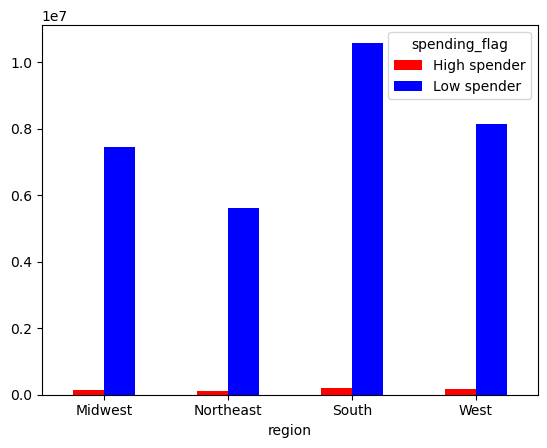

In [16]:
bar_spend_region = crosstab.plot(kind = 'bar', rot = 0, color = ['red','blue'])

# Create Activity Flag

In [6]:
# Create a flag for 'low-activity' customers
ic_data.loc[ic_data['max_order'] < 5, 'activity_flag'] = 'Low-activity'

In [7]:
# Create a flag for 'high-activity' customers
ic_data.loc[ic_data['max_order'] >= 5, 'activity_flag'] = 'High-activity'

In [8]:
# Verify that column is updated
ic_data['activity_flag'].value_counts(dropna = False)

High-activity    30965686
Low-activity      1440355
Name: activity_flag, dtype: int64

In [9]:
# Create a new dataframe to store the high-activity customers
df_high_activity = ic_data.loc[ic_data['activity_flag'] == 'High-activity']

# Export

In [10]:
# Export high activity dataframe
df_high_activity.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'high_activity_customers.pkl'))